In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import fashion_mnist

get the train and test data from fashion_mnist

In [3]:
 (X_train_full,y_train_full),(X_test,y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Let,s see the shape of the data

In [4]:
print(X_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [ ]:
y_train_full # In the output they have assigned number of each categaory of cloth

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Divide the train_full_data for both validation and train and scale the data

In [ ]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


Let's show a image in two formats

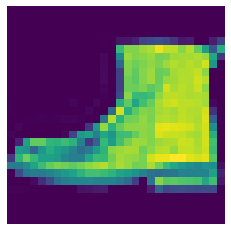

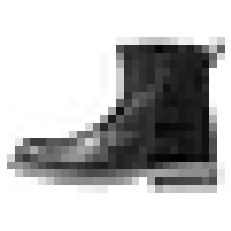

In [ ]:
plt.imshow(X_train[3])
plt.axis('off')
plt.show()
plt.imshow(X_train[3],cmap='binary')
plt.axis('off')
plt.show()

we can see the image in heatmap 

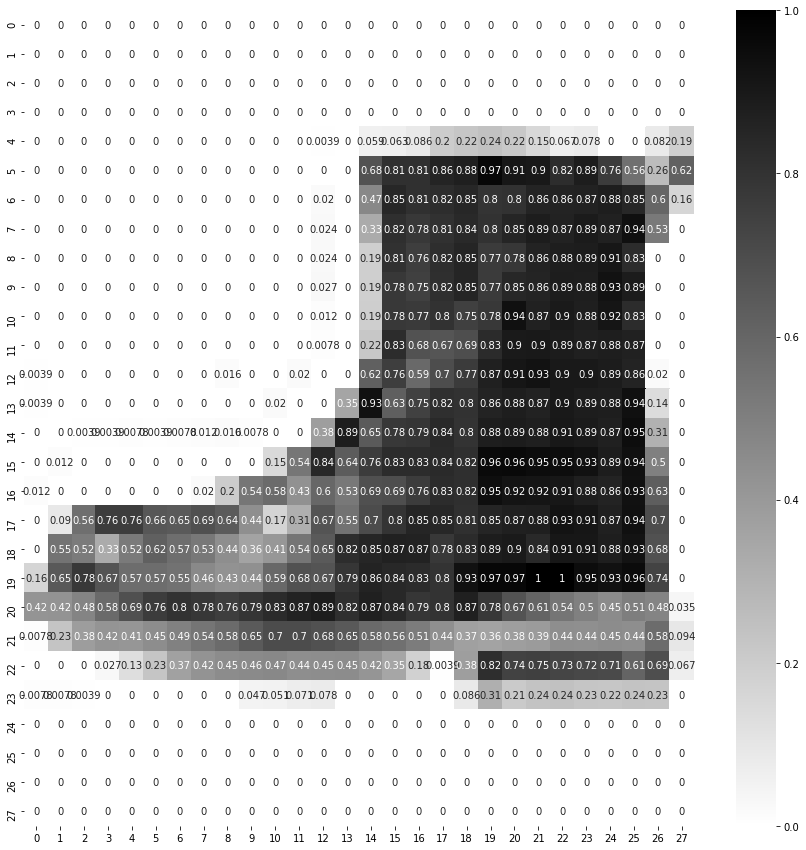

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[3], annot=True, cmap="binary")

Here output for X_train is number,that means here X_train[3] output is 9 means shoes

In [ ]:
y_train[3]

9

next step is define list of layers for the ANN model

In [ ]:

LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name = 'inputLayer'),
          tf.keras.layers.Dense(300,activation='relu',name = 'hiddenLayer1'),
          tf.keras.layers.Dense(100,activation='relu',name = 'hiddenLayer2'),
          tf.keras.layers.Dense(10,activation='softmax',name = 'outputLayer')]

define sequential model with layers

In [ ]:
model = tf.keras.models.Sequential(layers=LAYERS)

In [ ]:
model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:

LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'SGD'
METRICS = ['accuracy']

model.compile(loss=LOSS,optimizer=OPTIMIZER,metrics=METRICS)


In [ ]:

HISTORY = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 0.7222 - accuracy: 0.7599 - val_loss: 0.5059 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4886 - accuracy: 0.8294 - val_loss: 0.4756 - val_accuracy: 0.8294
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4424 - accuracy: 0.8447 - val_loss: 0.4262 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8541 - val_loss: 0.4005 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8611 - val_loss: 0.3915 - val_accuracy: 0.8634
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3799 - accuracy: 0.8647 - val_loss: 0.3969 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3663 - accuracy: 0.8700 - val_loss: 0.3639 - val_accuracy:

In [ ]:
pd.DataFrame(HISTORY.history)

,loss,accuracy,val_loss,val_accuracy
0,0.722217,0.759927,0.505874,0.8282
1,0.488632,0.829436,0.475635,0.8294
2,0.442358,0.844745,0.426170,0.8554
3,0.417067,0.854109,0.400505,0.8604
4,0.396291,0.861127,0.391526,0.8634
5,0.379937,0.864745,0.396899,0.8612
6,0.366279,0.870000,0.363905,0.8742
7,0.354751,0.874709,0.357604,0.8776
8,0.343748,0.878000,0.353321,0.8750
9,0.335344,0.880727,0.342154,0.8780


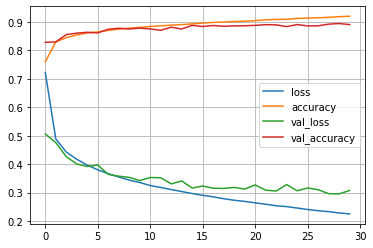

In [ ]:
pd.DataFrame(HISTORY.history).plot()
plt.grid()

In [ ]:

import time
import os

def SaveModel_Path(model_dir='SAVED_MODELS'):
  os.makedirs(model_dir,exist_ok=True)
  filename = time.strftime('MODEL_%Y_%m_%d_%H-%M_%s_.h5')
  model_path = os.path.join(model_dir,filename)
  print("model successfully saved..")
  return model_path

In [ ]:
model_save_path = model.save(SaveModel_Path())

model successfully saved..


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8790


[0.3421744704246521, 0.8790000081062317]

Take first 3 images in test set to predict

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

y_pred


array([[7.4429772e-07, 3.9465377e-08, 4.6441619e-06, 4.9193437e-07,
        7.7359454e-07, 9.7156753e-04, 1.3303222e-06, 3.4639866e-03,
        3.2547825e-05, 9.9552393e-01],
       [9.1074326e-06, 1.0855805e-08, 9.9981302e-01, 4.0924761e-09,
        1.0035030e-04, 4.0849130e-12, 7.7534205e-05, 5.2391780e-14,
        1.3566241e-09, 6.0724461e-13],
       [8.9566231e-07, 9.9999869e-01, 3.1884433e-08, 3.5514361e-07,
        5.1882729e-08, 4.8355379e-13, 4.6130005e-10, 1.2727855e-11,
        5.0727258e-09, 8.0092964e-12]], dtype=float32)

prediction of X_new is y_pred and it has long exponentioal number so,we take round to 2

In [ ]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

above predict code gives array of values in tha image.we need to take where the values present i.e argument

In [ ]:
import numpy as np

y_pred = np.argmax(model.predict(X_new),axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
## Method to map the label with Description
def predict_category(a):
    if a==0:
        return ("T-shirt/top")
    elif a==1:
        return ("Trouser")
    elif a==2:
        return("Pullover")
    elif a==3:
        return("Dress")
    elif a==4:
        return("Coat")
    elif a==5:
        return("Sandal")
    elif a==6:
        return("Shirt")
    elif a==7:
        return("Sneaker")
    elif a==8:
        return("Bag")
    elif a==9:
        return("Ankle boot")
    else:
        return("unknown category")

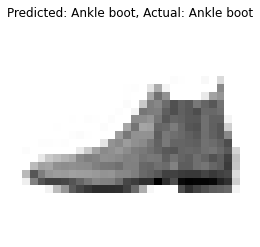

------------------------------------------------------------


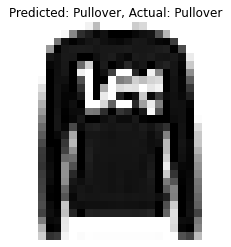

------------------------------------------------------------


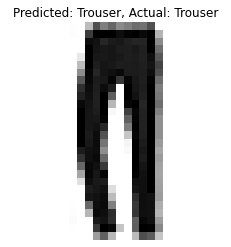

------------------------------------------------------------


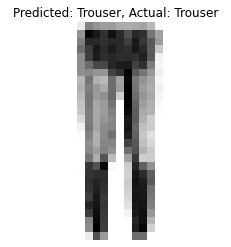

------------------------------------------------------------


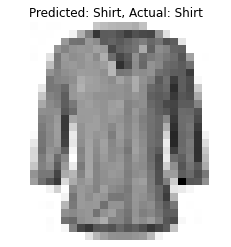

------------------------------------------------------------


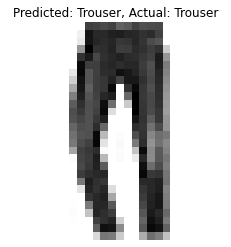

------------------------------------------------------------


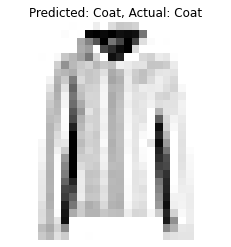

------------------------------------------------------------


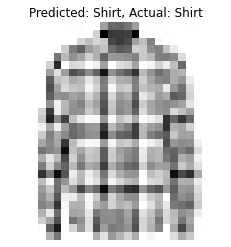

------------------------------------------------------------


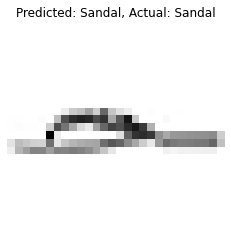

------------------------------------------------------------


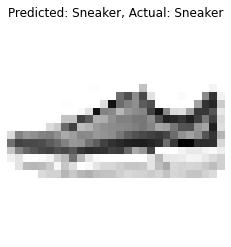

------------------------------------------------------------


In [ ]:
y_test_new = y_test[:10]
X_new = X_test[:10]
y_pred = np.argmax(model.predict(X_new), axis=-1)
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {predict_category(pred)}, Actual: {predict_category(actual)}")
    plt.axis('off')
    plt.show()
    print("---"*20)